# Illustration PatchMatch
### Julien.Rabin@unicaen.fr 2020
### this demo is based on the following code : https://github.com/EllBock/patchmatch
### by Luca Boccia et al. during 2019 internship at GREYC
### Exercice : test this code !

In [1]:
from patchmatch import MappingUtils
from patchmatch import PatchMatchLib
from patchmatch import PatchMatchGPU

import torch
import torchvision

from PIL import Image
import matplotlib.pyplot as plt

import time

In /Users/rabin/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/rabin/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/rabin/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/rabin/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/rabin/miniconda3/lib/python3.6/site-packages/m

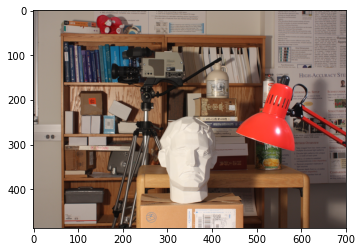

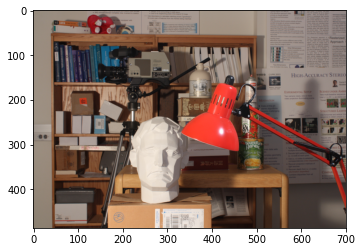

In [2]:
image = Image.open('images/im0.png')
reference = Image.open('images/im1.png')

if False : # resize images
    imsize = 256
    image = torch.nn.functional.adaptive_avg_pool2d(torchvision.transforms.ToTensor()(image), imsize)
    reference = torch.nn.functional.adaptive_avg_pool2d(torchvision.transforms.ToTensor()(reference), imsize)
    image = torchvision.transforms.ToPILImage()(image)
    reference = torchvision.transforms.ToPILImage()(reference)


plt.figure()
plt.imshow(image)
plt.show()
plt.imshow(reference)
plt.show()

In [3]:
# exact CPU version
if False :
    t0 = time.time()
    offsets, mapping = PatchMatchLib.patch_match(image, reference, patch_size=8, iterations=5, alpha=0.5)
    t0 = time.time()-t0      
    print('Elapsed time with CPU : ', t0, ' seconds')


# GPU-friendly version with approximation (PCA dimension reduction on patch + Jump flood technique)
t0 = time.time()
offsets2, mapping2 = PatchMatchGPU.patch_match(image, reference, patch_size=8, iterations=5, dtresh=0.01, initialization=None, itresh=None, device=None)
t0 = time.time()-t0      
print('Elapsed time with GPU : ', t0, ' seconds')


Elapsed time with GPU :  6.334829092025757  seconds


In [4]:
# reconstruct
image2 = MappingUtils.reconstruct(reference, mapping2)

# colormap of offset
offsets_color = MappingUtils.colormap(offsets2)

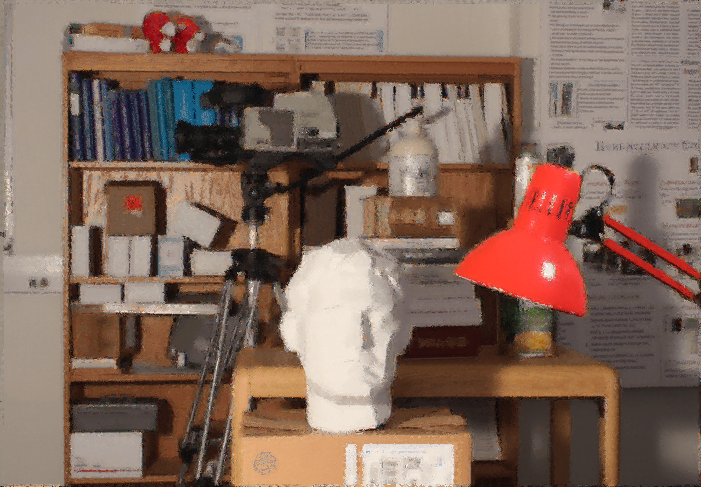

In [5]:
image2

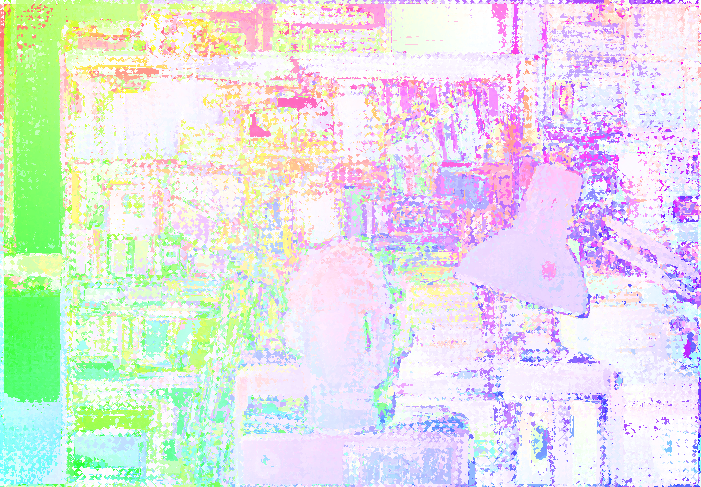

In [6]:
offsets_color

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 700.5, 486.5, -0.5)

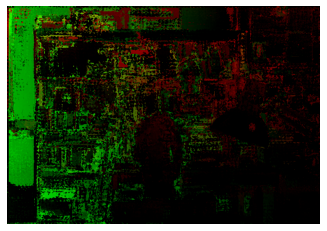

In [7]:
offsets2_RGB = torch.cat((offsets2.float(), torch.zeros((offsets2.size(0), offsets2.size(1),1))), dim=2)
offsets2_RGB = offsets2_RGB / offsets2_RGB.max()

plt.figure()
plt.imshow(offsets2_RGB[:,:,:])
plt.axis("off")
